**Imports Basic librarries;**

In [1]:
import os
import numpy as np
import random
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import cv2

In [2]:
!nvidia-smi

Wed Feb 26 08:46:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   67C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
HOME = os.getcwd()
print(HOME)

/content


**Install Dependencis & Requirements;**

In [3]:
!pip install torch

!pip install torchvision

!pip install torch torchvision torchaudio

!pip install xmltodict

In [4]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.7/112.6 GB disk)


In [5]:
import torch
from ultralytics import YOLO
from IPython import get_ipython
import xmltodict

**Custom Datasets Preparations & Training with Roboflow;**

Dataset Annotations & Collections with Roboflow Platform; https://universe.roboflow.com/data-science-ai-workspace-for-dataset-annotations/plantdiseasedetectionassignments/dataset

In [9]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.3 MB/s eta 0:00:00


In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key="4WRJ64r0rHSkhaN2T1a4")
project = rf.workspace("data-science-ai-workspace-for-dataset-annotations").project("plantdiseasedetectionassignments")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PlantDiseaseDetectionAssignments-3 in yolov8:: 100%|██████████| 208/208 [00:00<00:00, 2251.37it/s]


**Custom Datasets Training with Yolo V8 Model;**

In [11]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=60 imgsz=640 plots=True

/content
100% 131M/131M [00:00<00:00, 234MB/s]
New https://pypi.org/project/ultralytics/8.3.79 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/datasets/PlantDiseaseDetectionAssignments-3/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, a

**Validate Custom Model;**

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,126,457 parameters, 0 gradients, 257.4 GFLOPs
val: Scanning /content/datasets/PlantDiseaseDetectionAssignments-3/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100% 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.79s/it]
                   all         16         90      0.696      0.299       0.39      0.126
                 Borer         16         16          1      0.239      0.424      0.121
               Healthy         16         50      0.481        0.2      0.253     0.0679
                  Soil         13         24      0.607      0.458      0.492      0.189
Speed: 0.3ms preprocess, 68.3ms inference, 0.0ms loss, 19.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Model Trainings Evalations & Visualizations;**

/content


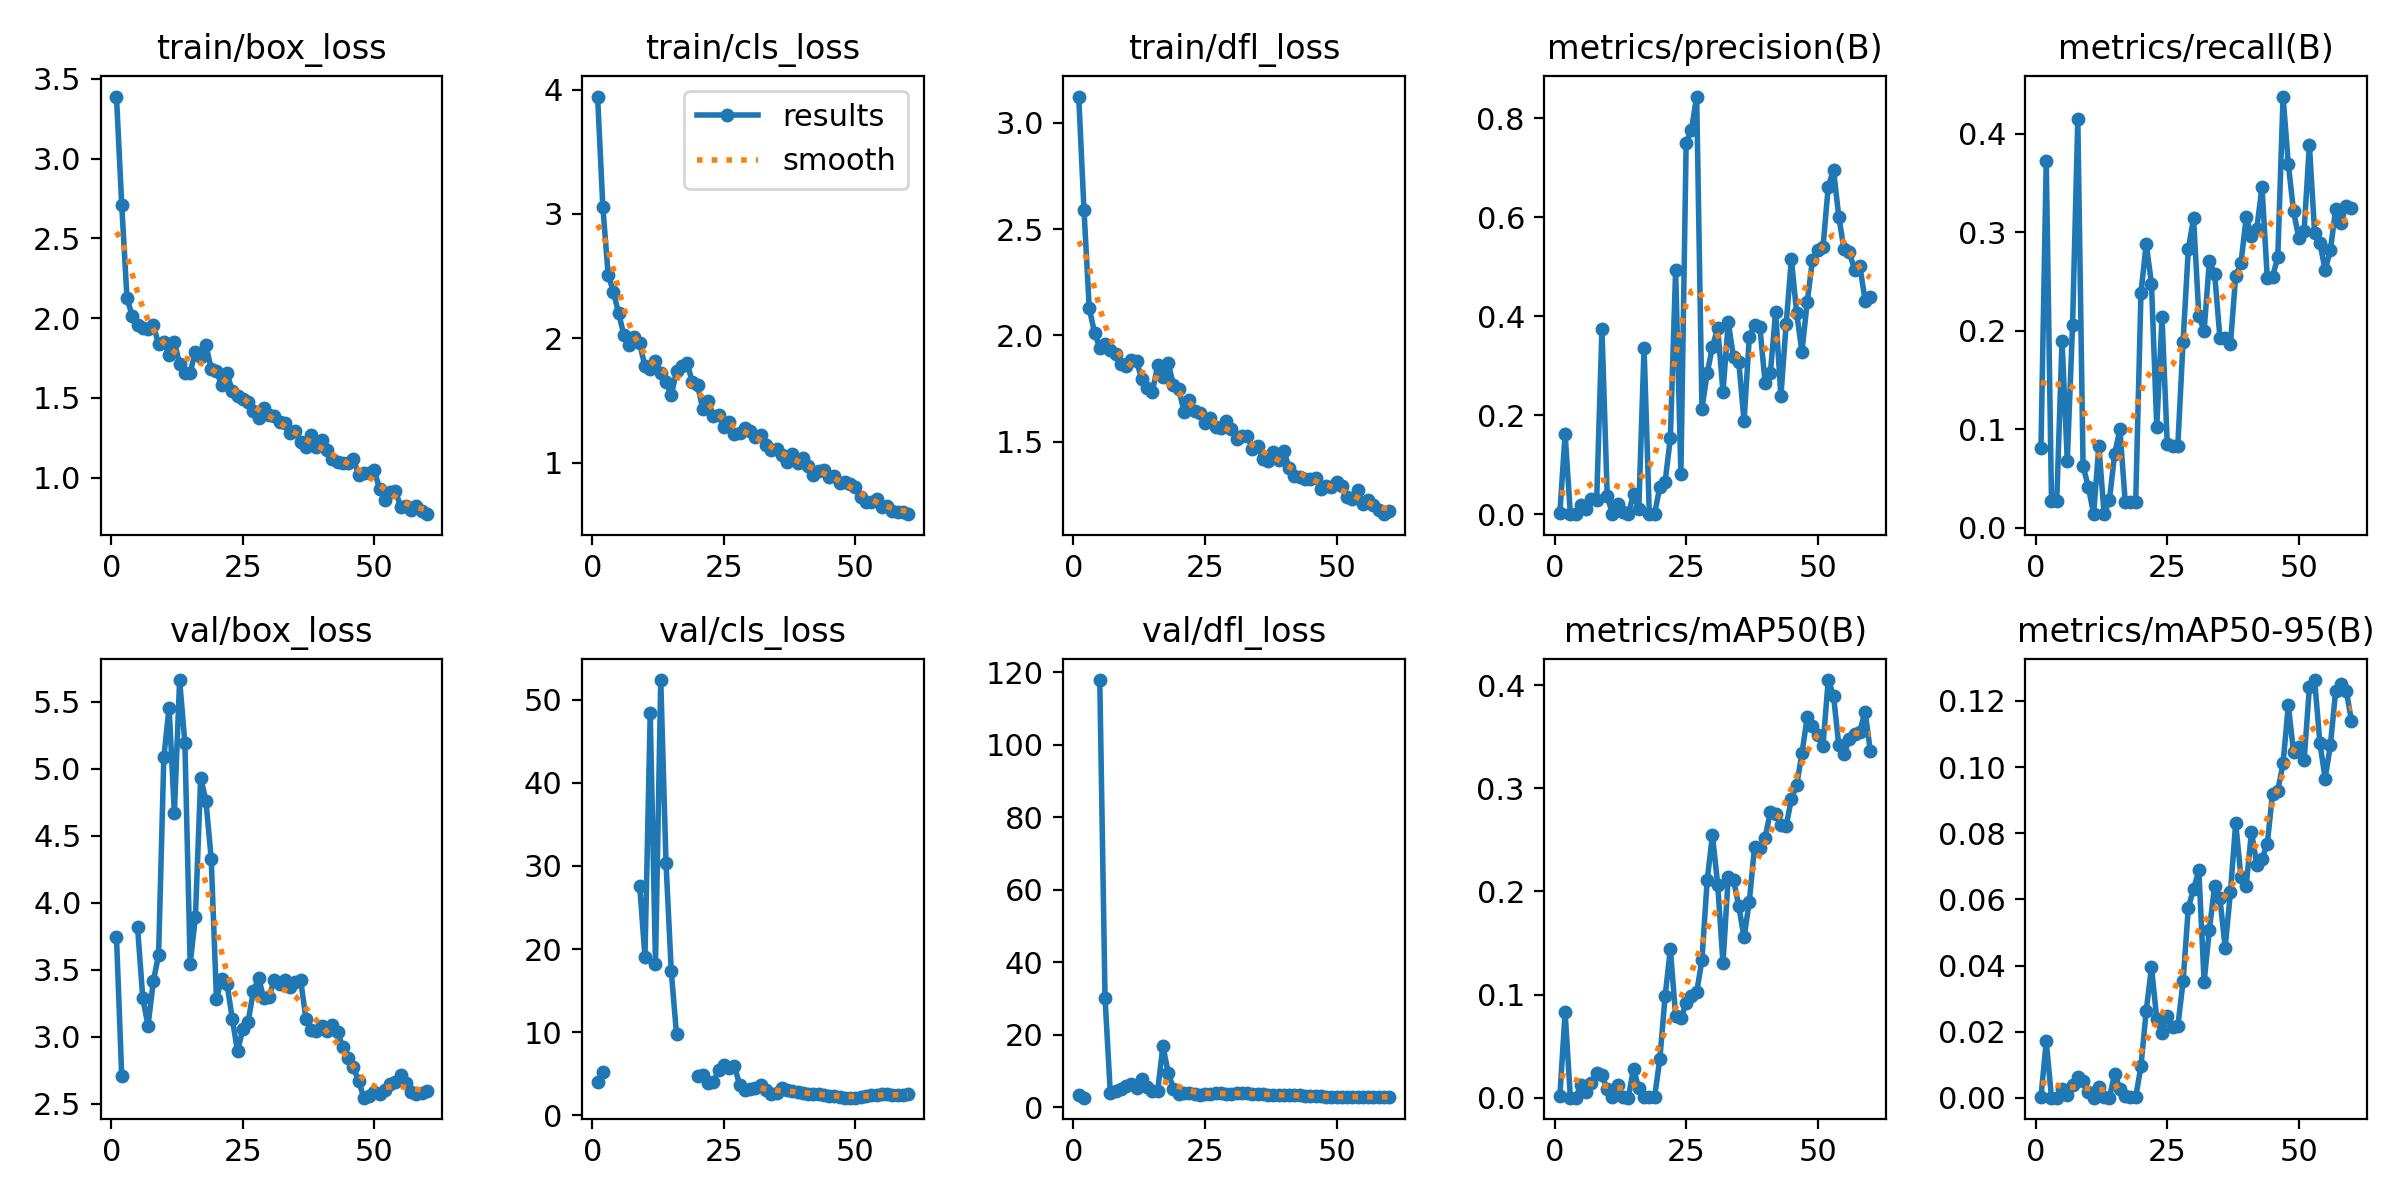

In [13]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=640)

/content


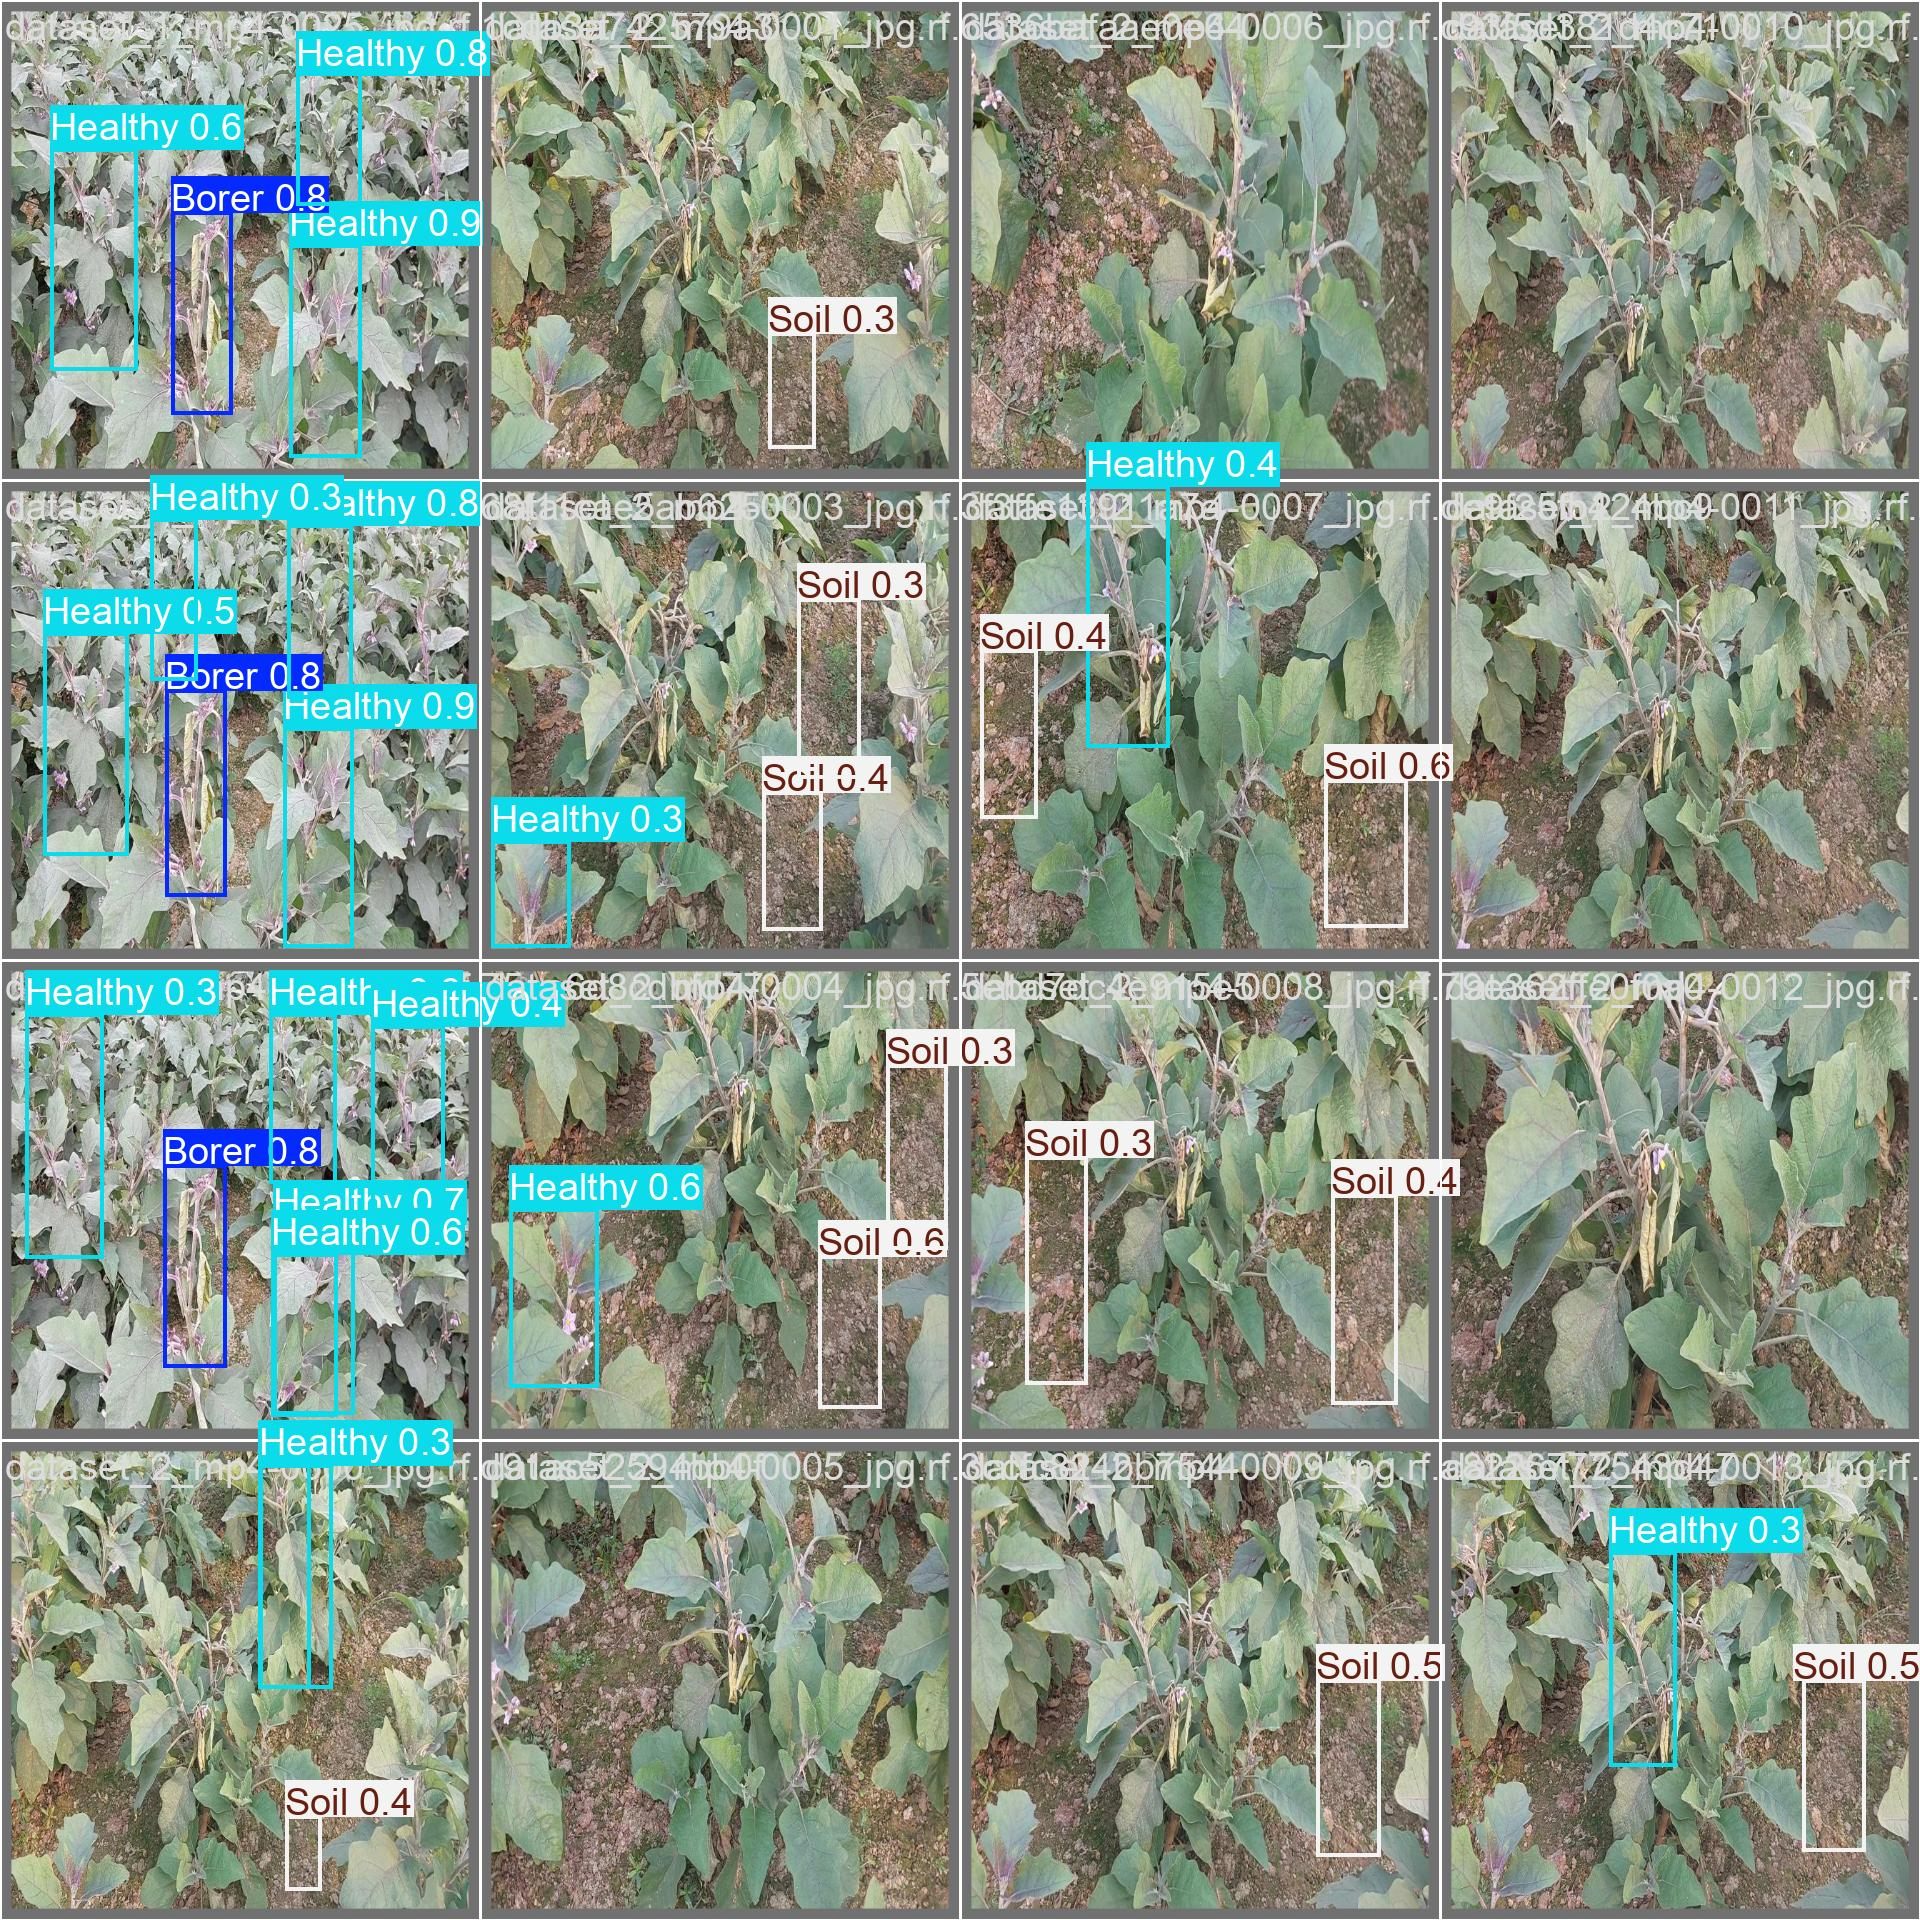

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=640)

/content


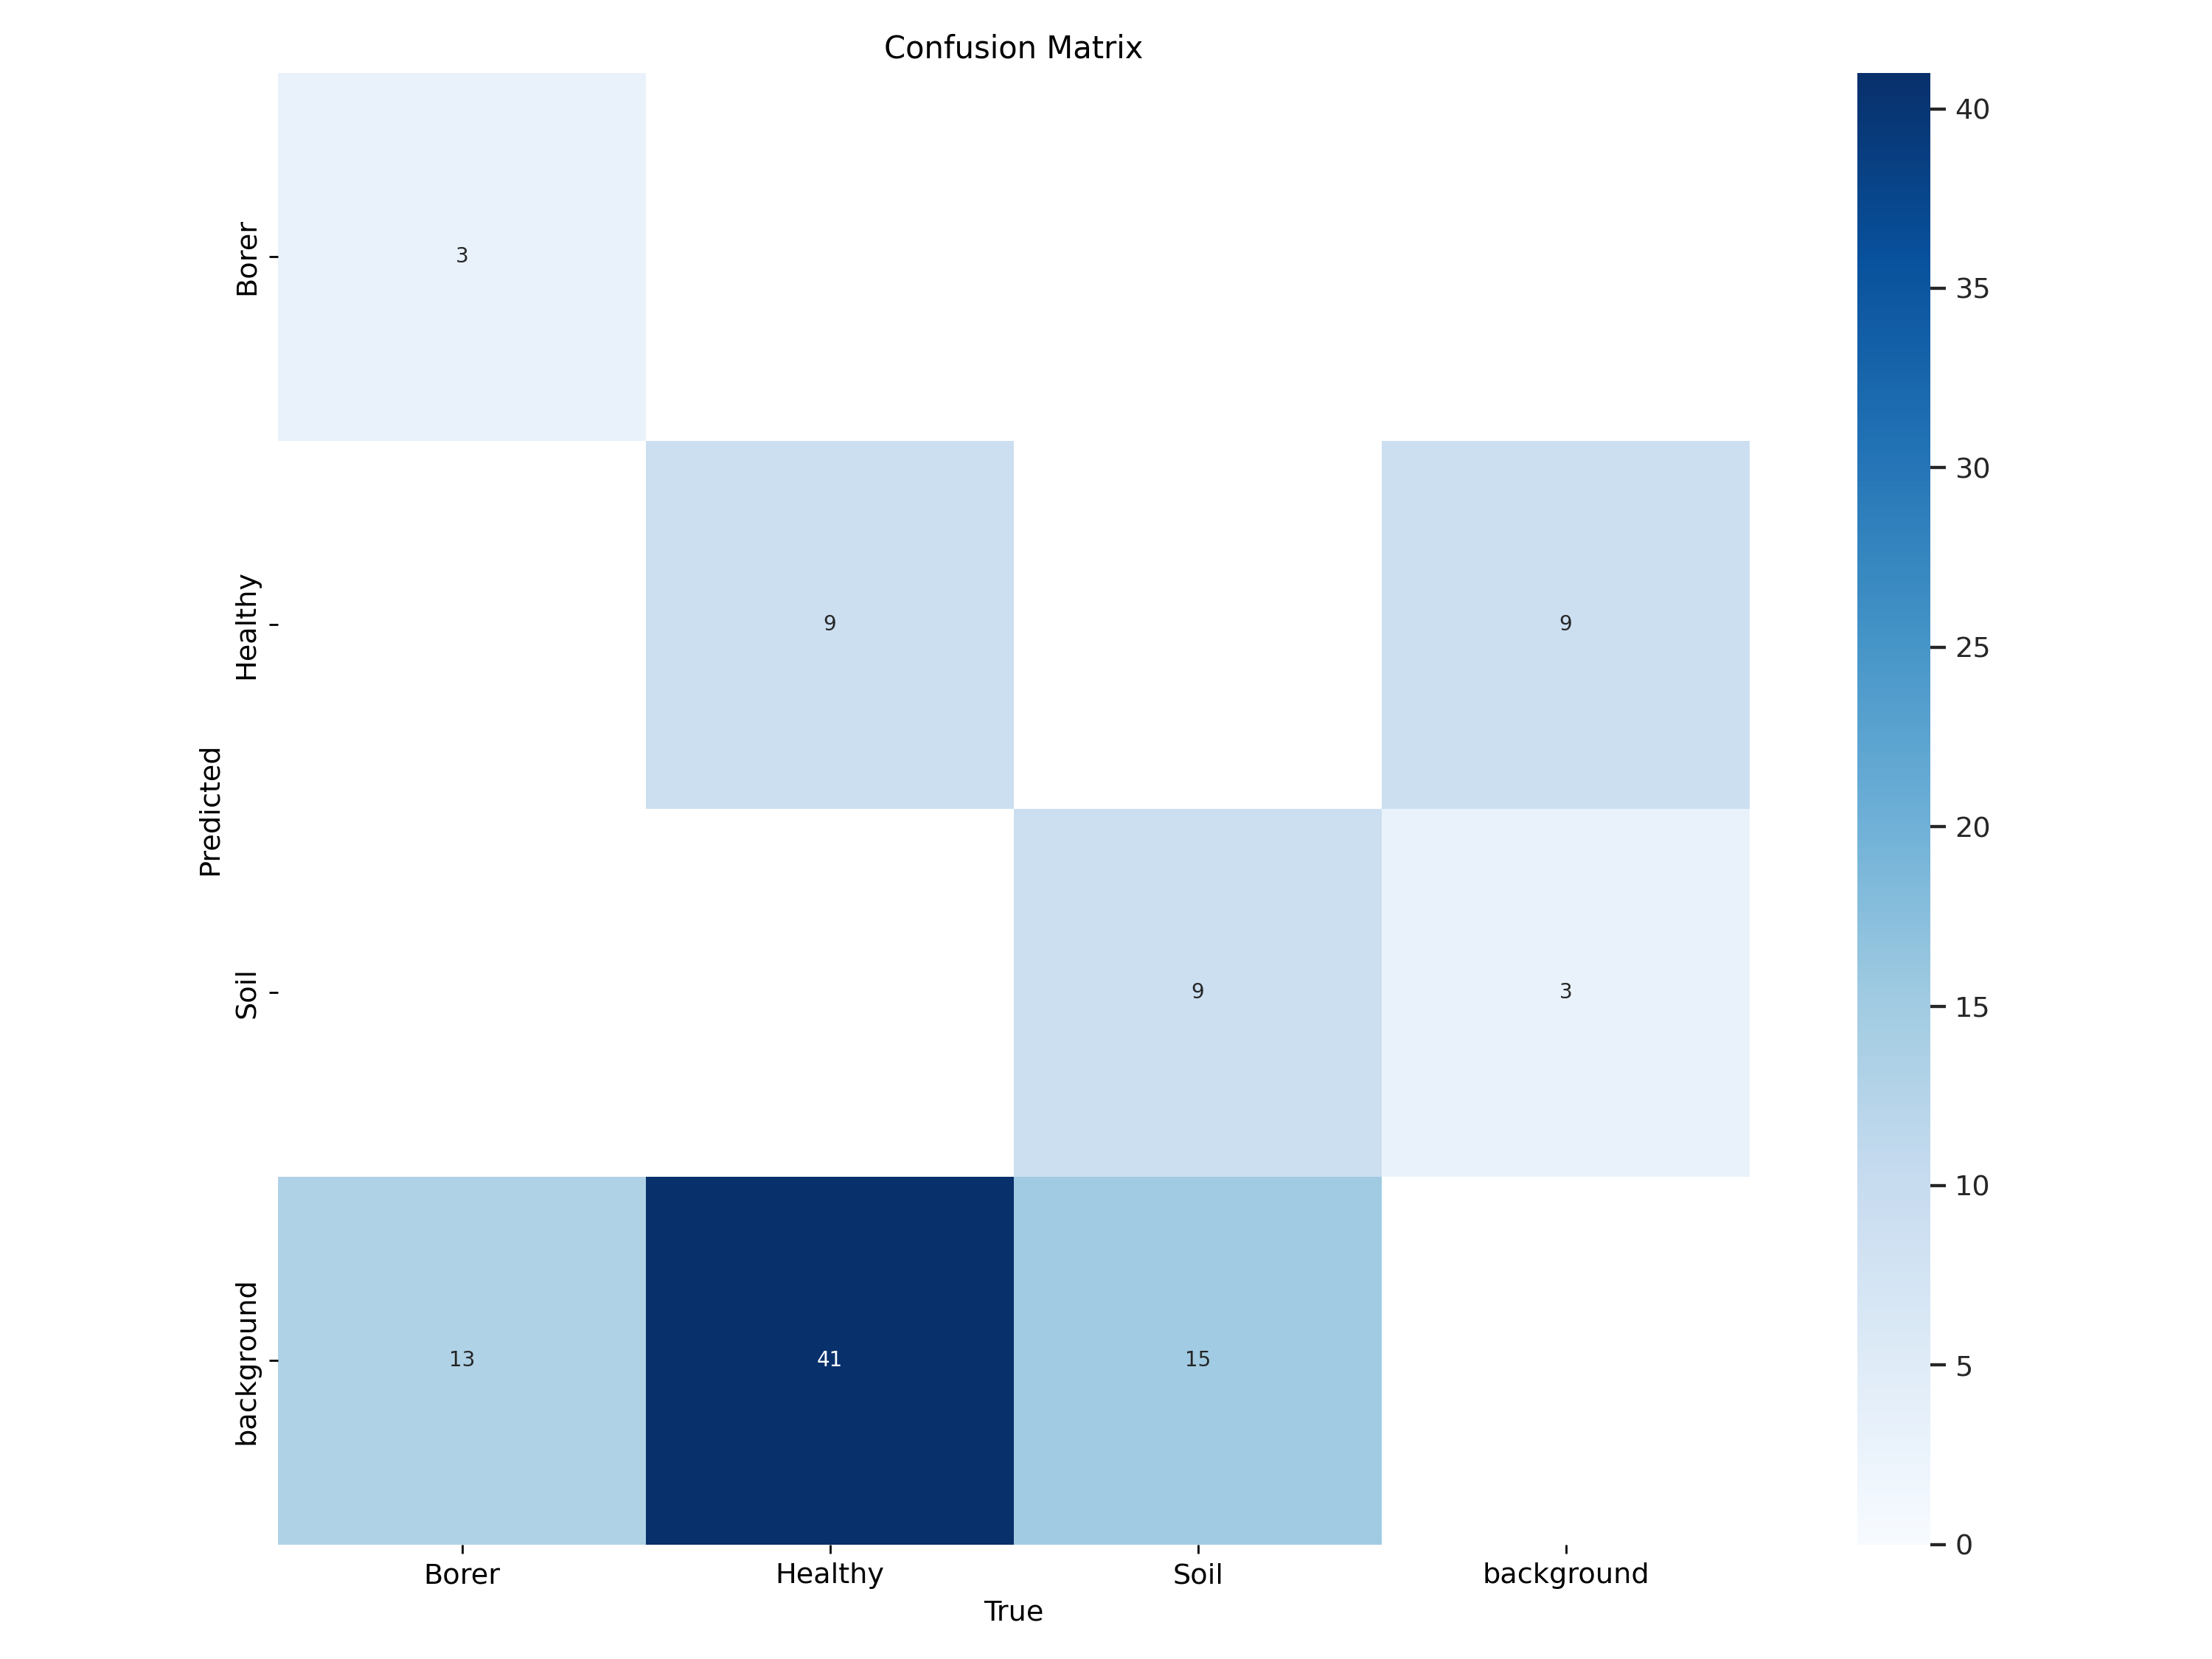

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=640)

/content


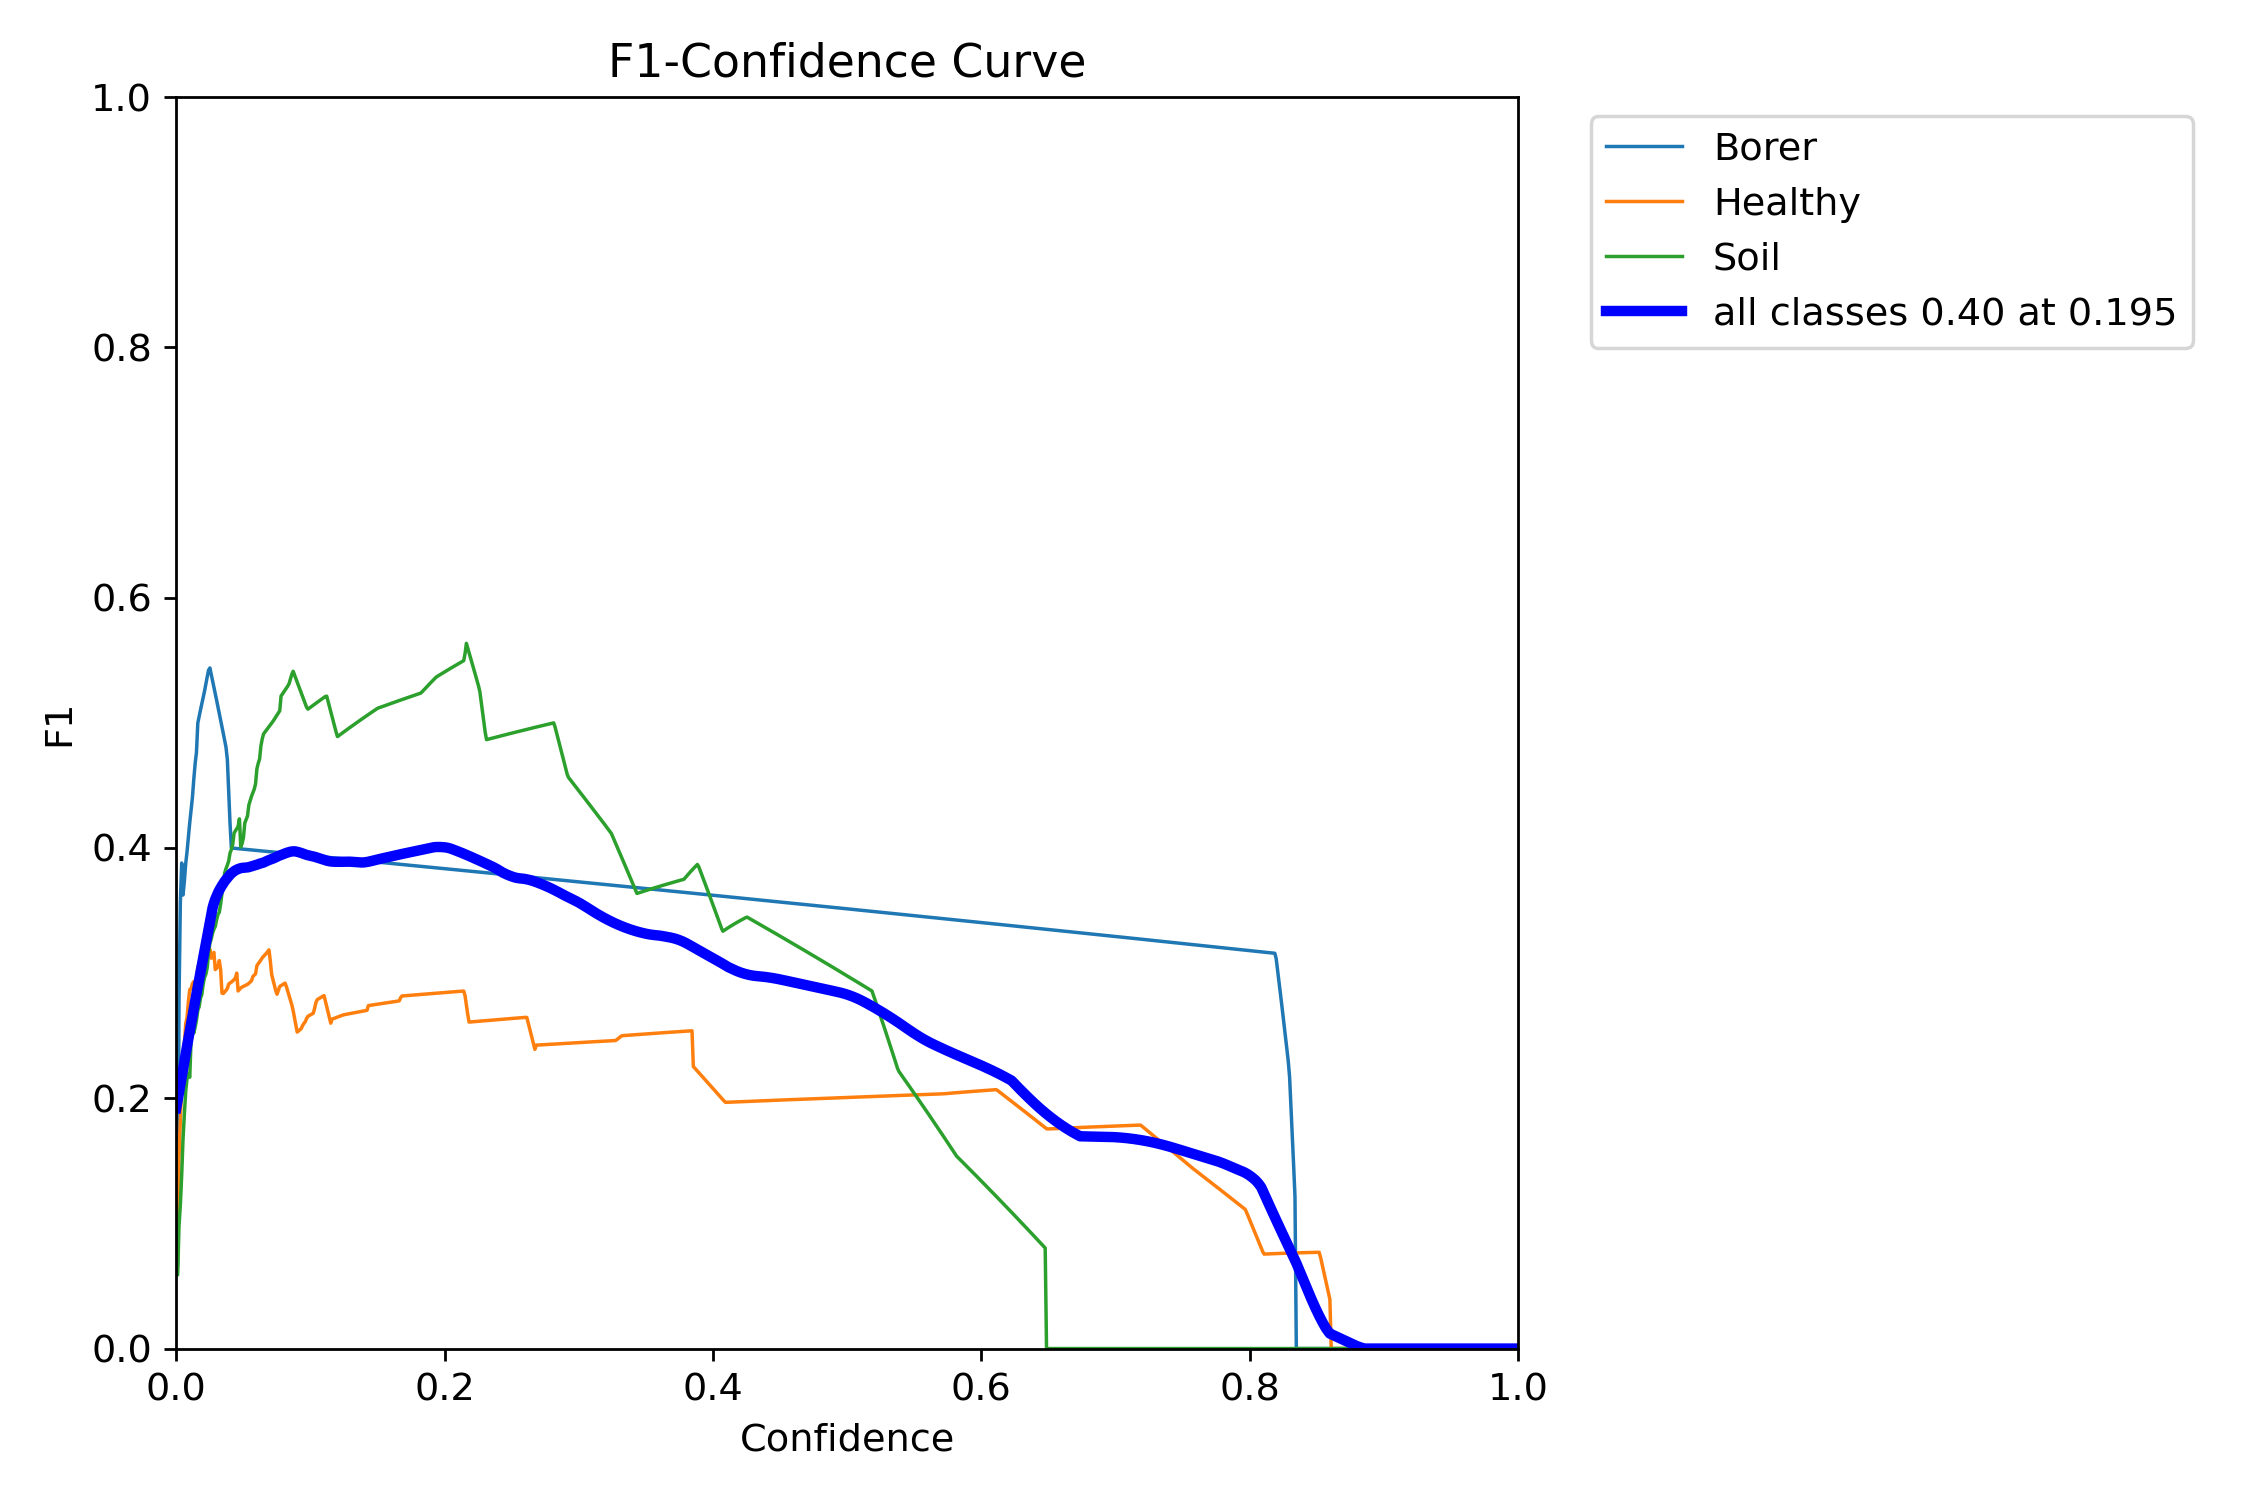

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=640)

/content


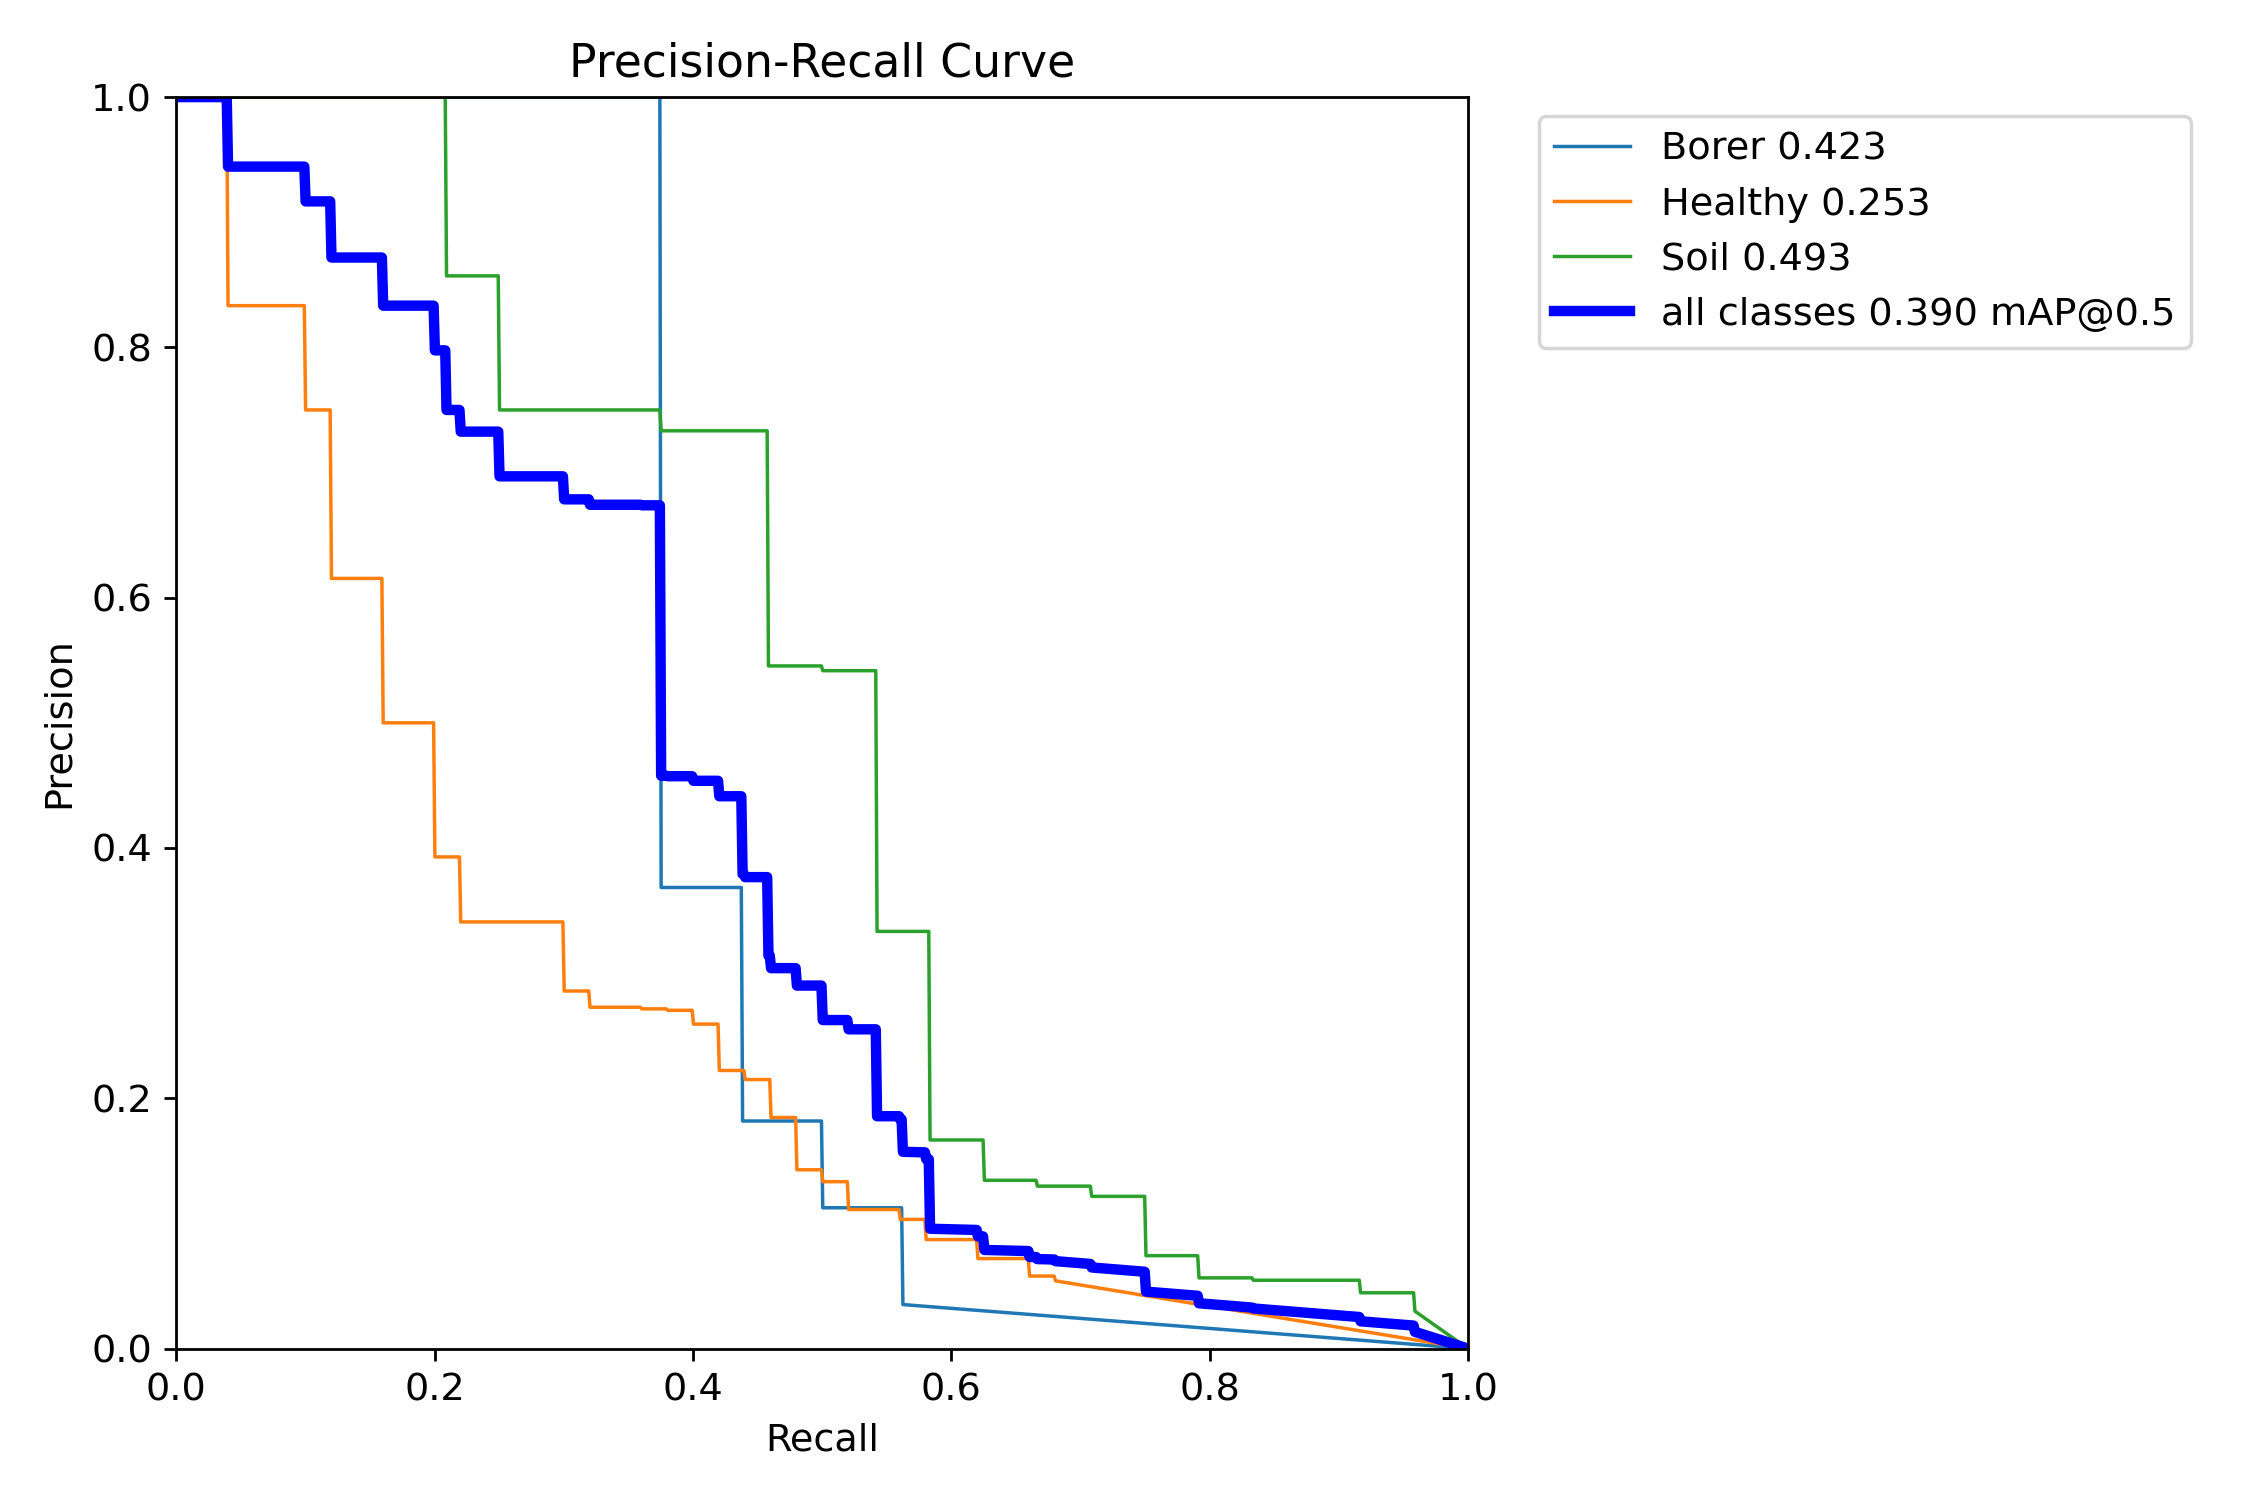

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=640)

/content


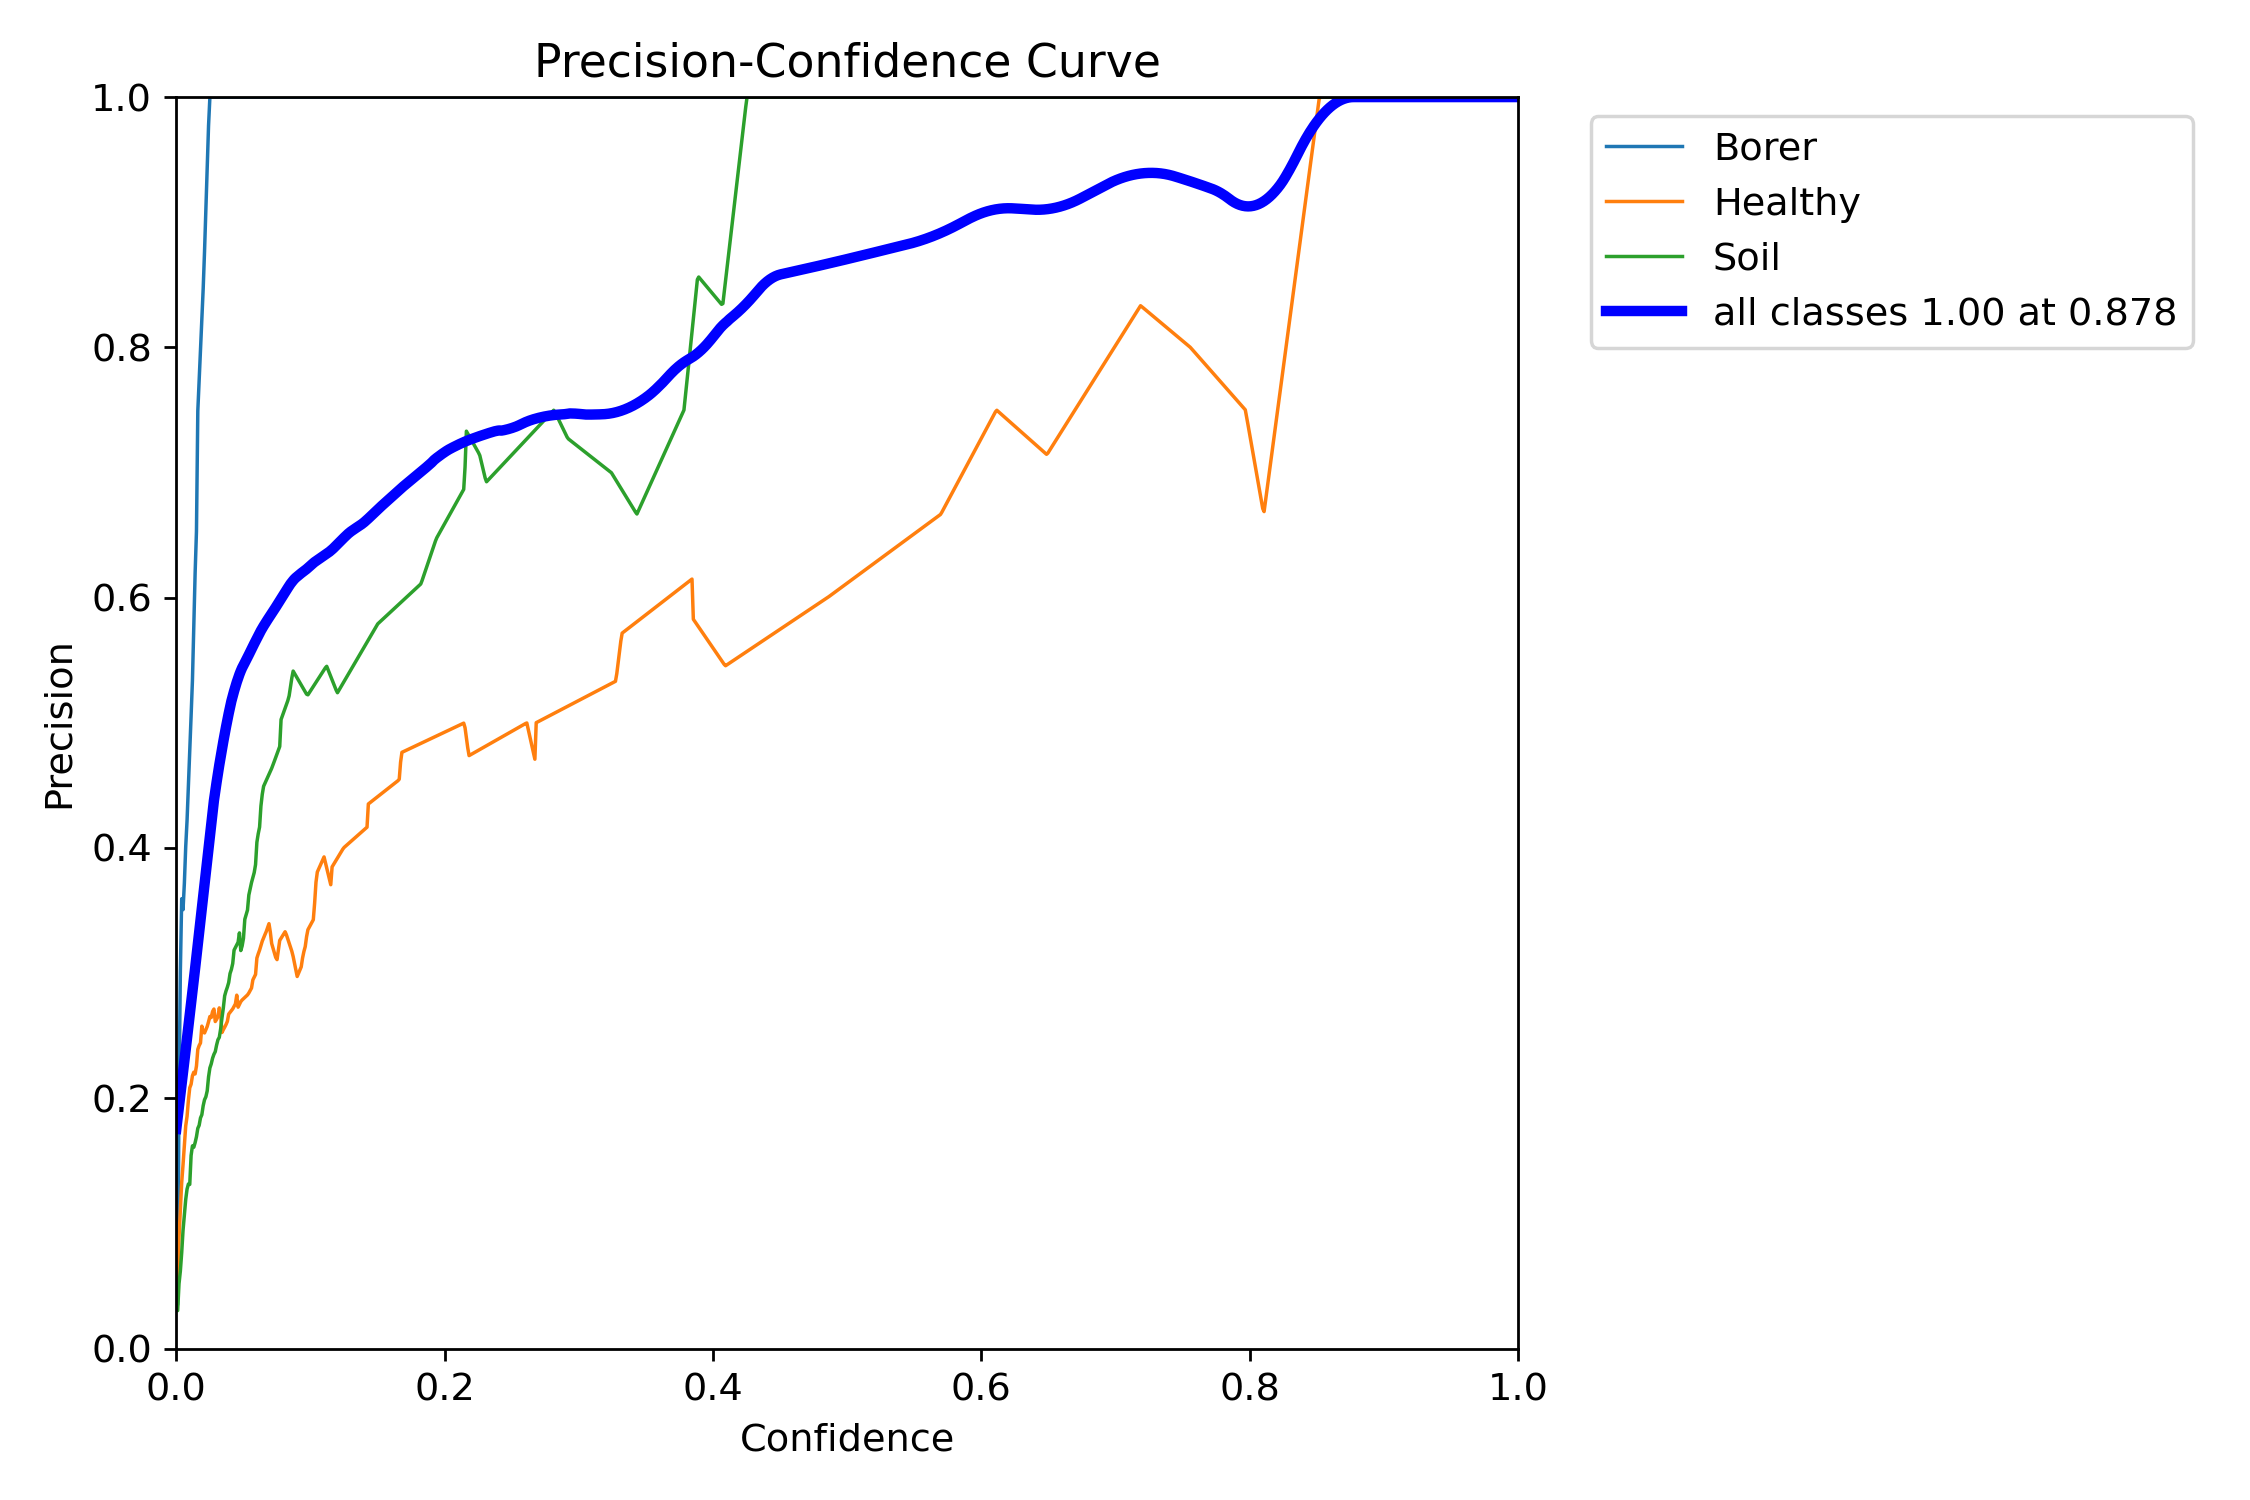

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=640)

**Inference with Custom Model on Test images & Sample test video datasets;**

In [19]:
#For Test images;

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.40 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,126,457 parameters, 0 gradients, 257.4 GFLOPs

image 1/4 /content/datasets/PlantDiseaseDetectionAssignments-3/test/images/dataset_1_mp4-0020_jpg.rf.b529abdf11e0dbbb369c96b078eb0f57.jpg: 640x640 1 Borer, 3 Healthys, 1 Soil, 82.6ms
image 2/4 /content/datasets/PlantDiseaseDetectionAssignments-3/test/images/dataset_1_mp4-0024_jpg.rf.68b7e1746aee645b8a93a5c99059ed59.jpg: 640x640 1 Borer, 3 Healthys, 79.3ms
image 3/4 /content/datasets/PlantDiseaseDetectionAssignments-3/test/images/dataset_1_mp4-0028_jpg.rf.0268b878cb9bd18019489796a8c60983.jpg: 640x640 1 Borer, 2 Healthys, 79.3ms
image 4/4 /content/datasets/PlantDiseaseDetectionAssignments-3/test/images/dataset_2_mp4-0002_jpg.rf.48a2d6dfe7e61638f30d607f29069410.jpg: 640x640 (no detections), 72.4ms
Speed: 4.4ms preprocess, 78.4ms inference, 79.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to

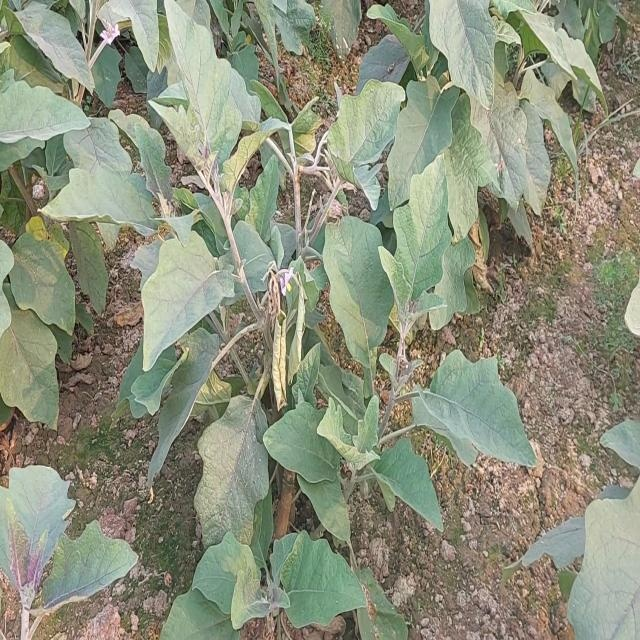

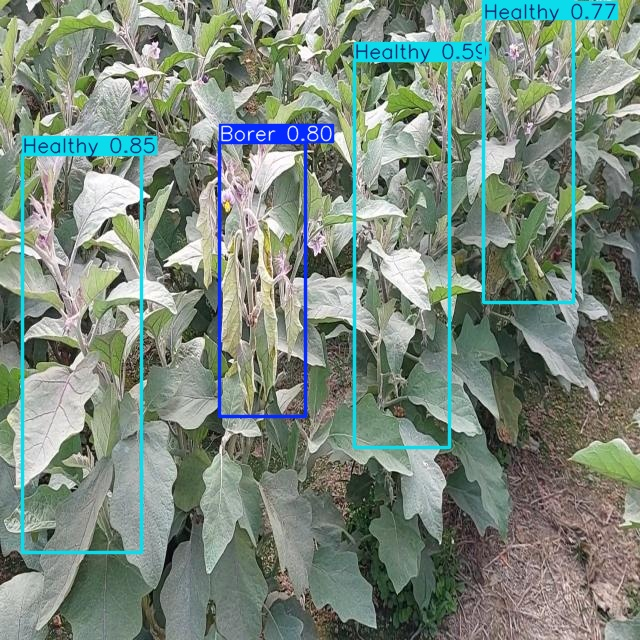

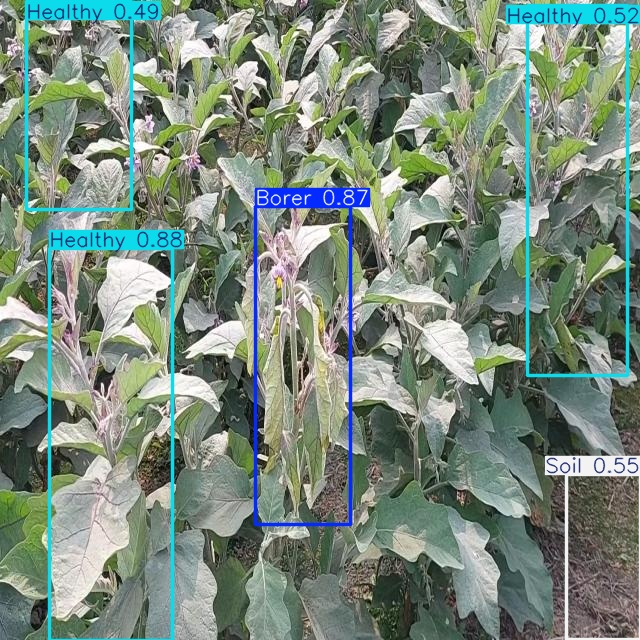

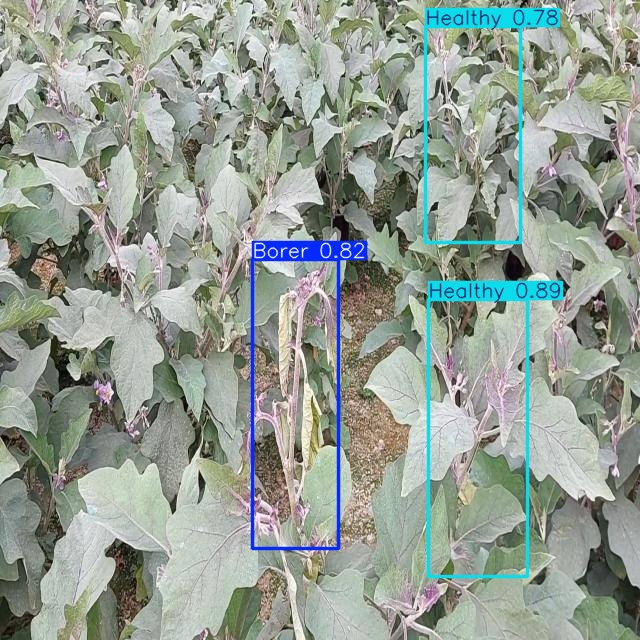

In [20]:
import glob
from IPython.display import Image, display # Make sure to import display

# Now, loop through your predicted images and display them
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:4]:
    display(Image(filename=image_path, width=640))  # Use display function to show the image
    print("\n")

In [21]:
#For Test video datasets;

# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Path to the test video 1
video_path = '/content/dataset_1.mp4'

# Perform prediction on the video
results = model.predict(source=video_path, save=True, conf=0.40)
# results are saved to runs/detect/predict



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/937) /content/dataset_1.mp4: 384x640 1 Borer, 1 Healthy, 63.6ms
video 1/1 (frame 2/937) /content/dataset_1.mp4: 384x640 1 Borer, 1 Healthy, 53.6ms
video 1/1 (frame 3/937) /content/dataset_1.mp4: 384x640 1 Borer, 1 Healthy, 52.6ms
video 1/1 (frame 4/937) /content/dataset_1.mp4: 384x640 1 Borer, 45.1ms
video 1/1 (frame 5/937) /content/dataset_1.mp4: 384x640 1 Borer, 45.1ms
video 1/1 (frame 6/937) /content/dataset_1.mp4: 384x640 1 Borer

In [6]:
# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')
# Path to the test video 2
video_path = '/content/dataset_2.mp4'

# Perform prediction on the video
results = model.predict(source=video_path, save=True, conf=0.40)
# results are saved to runs/detect/predict



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1280) /content/dataset_2.mp4: 384x640 1 Soil, 227.5ms
video 1/1 (frame 2/1280) /content/dataset_2.mp4: 384x640 1 Soil, 62.9ms
video 1/1 (frame 3/1280) /content/dataset_2.mp4: 384x640 (no detections), 63.0ms
video 1/1 (frame 4/1280) /content/dataset_2.mp4: 384x640 1 Soil, 63.0ms
video 1/1 (frame 5/1280) /content/dataset_2.mp4: 384x640 1 Soil, 43.2ms
video 1/1 (frame 6/1280) /content/dataset_2.mp4: 384x640 (no detections), 43.2ms
video

**Learning Resources & Related Works; 🏆**



*   [Roboflow Notebooks](https://github.com/roboflow/notebooks)

*   [Roboflow YouTube](https://www.youtube.com/c/Roboflow)

*   [Roboflow Models](https://roboflow.com)


*   [Roboflow Discuss](https://discuss.roboflow.com/)